IMG NAME: bg


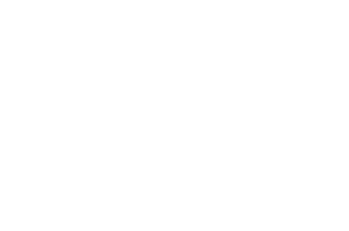

In [1]:
from scipy.signal import convolve2d
from matplotlib import pyplot as plt
import numpy as np
import cv2
from PIL import Image

%matplotlib inline


filename = input('IMG NAME: ')
original_img = Image.open('Line generation imgs/' + filename + '.jpg').convert('L')
original_img = np.array(original_img)
original_img = original_img/255
fil = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
fmap2 = convolve2d(original_img,fil,mode='same')
plt.axis('off')
plt.imsave('Line generation imgs/' + filename + 'output' + '.jpg', fmap2, cmap='gray')




import numpy as np
from PIL import Image

# Open the input image as numpy array, convert to greyscale and drop alpha
npImage=np.array(Image.open('Line generation imgs/' + filename + 'output' + '.jpg').convert("L"))

# Get brightness range - i.e. darkest and lightest pixels
min=np.min(npImage)        # result=144
max=np.max(npImage)        # result=216

# Make a LUT (Look-Up Table) to translate image values
LUT=np.zeros(256,dtype=np.uint8)
LUT[min:max+1]=np.linspace(start=0,stop=255,num=(max-min)+1,endpoint=True,dtype=np.uint8)

# Apply LUT and save resulting image
Image.fromarray(LUT[npImage]).save('result.png')




# Import required libraries
from tkinter import *
from PIL import ImageTk, Image

# Create an instance of tkinter window
win = Tk()

# Define the geometry of the window
win.geometry("700x500")

frame = Frame(win, width=600, height=400)
frame.pack()
frame.place(anchor='center', relx=0.5, rely=0.5)

# Create an object of tkinter ImageTk
img = ImageTk.PhotoImage(Image.open('Line generation imgs/' + filename + 'output' + '.jpg'))
img2 = ImageTk.PhotoImage(Image.open('Line generation imgs/' + filename + '.jpg'))
# Create a Label Widget to display the text or Image
label = Label(frame, image = img)
label.grid(column=0,row=0)
label2 = Label(frame, image = img2)
label2.grid(column=1,row=0)
win.mainloop()